<a href="https://colab.research.google.com/github/jorge-pichardo07/EDP1/blob/main/Galerkin_Tarea.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt


In [49]:
#Nombramos a los alfa como a
x = sp.symbols('x')
a1, a2, a3 = sp.symbols('a1 a2 a3')

In [50]:
#Usamos: β_i(x) = sin(iπx) para i=1,2,3")
# Definir funciones base β_i(x) = sin(iπx)
def beta(i_val):
    return sp.sin(i_val * sp.pi * x)


In [51]:
# la solución aproximada
u_approx = a1 * beta(1) + a2 * beta(2) + a3 * beta(3)

In [52]:
u_approx

a1*sin(pi*x) + a2*sin(2*pi*x) + a3*sin(3*pi*x)

In [53]:
#Condiciones
F_u0= u_approx.subs(x, 0)
F_u1= u_approx.subs(x, 1)

Solo verificamos quela condición si sea 0

In [54]:
F_u0

0

In [55]:
F_u1

0

In [56]:
# Calcular la segunda derivada
u_approx_d2 = sp.diff(u_approx, x, 2)


In [57]:
# Calculamos E = -u'' + u - x
E = -u_approx_d2 + u_approx - x
E_simple = sp.simplify(E)

In [58]:
#Sistema de ecuaciones
ecuaciones = []

for j in [1, 2, 3]:
    # Producto interno: ∫₀¹ E·β_j(x) dx
    integrando = E * beta(j)
    integral = sp.integrate(integrando, (x, 0, 1))
    ecuaciones.append(sp.Eq(integral, 0))

In [59]:
ecuaciones

[Eq(a1/2 + pi**2*a1/2 - 1/pi, 0),
 Eq(a2/2 + 2*pi**2*a2 + 1/(2*pi), 0),
 Eq(a3/2 + 9*pi**2*a3/2 - 1/(3*pi), 0)]

In [60]:
#Solucion del sistema
sol_as = sp.solve(ecuaciones, [a1, a2, a3])


In [61]:
sol_as

{a1: 2/(pi + pi**3), a2: -1/(pi + 4*pi**3), a3: 2/(3*pi + 27*pi**3)}

In [62]:
# Sustituir coeficientes en la solución aproximada
u_approx_final = u_approx.subs(sol_as)
u_approx_final_simple = sp.simplify(u_approx_final)


In [63]:
u_approx_final

2*sin(pi*x)/(pi + pi**3) - sin(2*pi*x)/(pi + 4*pi**3) + 2*sin(3*pi*x)/(3*pi + 27*pi**3)

In [64]:
u_approx_final_simple

2*sin(pi*x)/(pi + pi**3) - sin(2*pi*x)/(pi + 4*pi**3) + 2*sin(3*pi*x)/(3*pi + 27*pi**3)

In [65]:
#Solución exacta
u = sp.Function('u')
ode_exact = sp.Eq(-u(x).diff(x, 2) + u(x), x)
sol_exact = sp.dsolve(ode_exact, ics={u(0): 0, u(1): 0})
u_exact_expr = sol_exact.rhs

In [66]:
u_exact_expr

x - E*exp(x)/(-1 + exp(2)) + E*exp(-x)/(-1 + exp(2))

In [67]:

# Convertir expresiones simbólicas a funciones numéricas
u_approx_func = sp.lambdify(x, u_approx_final_simple, 'numpy')
u_exact_func = sp.lambdify(x, u_exact_expr, 'numpy')

In [68]:
# Puntos para evaluación
x_vals = np.linspace(0, 1, 500)
u_approx_vals = u_approx_func(x_vals)
u_exact_vals = u_exact_func(x_vals)

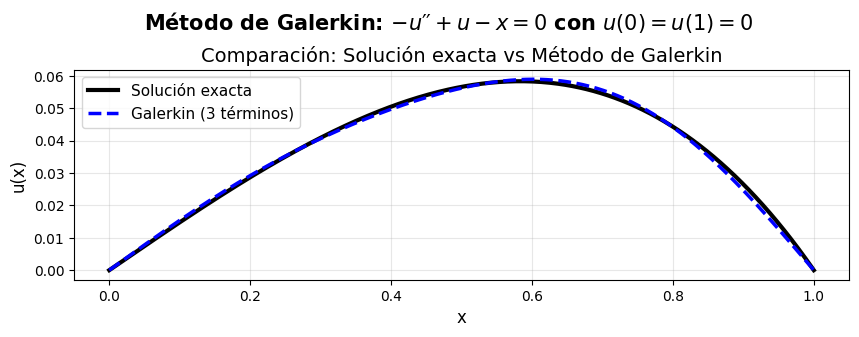

In [71]:
#GRÁFICA comparando ambos metodos
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(x_vals, u_exact_vals, 'k-', label='Solución exacta', linewidth=3)
plt.plot(x_vals, u_approx_vals, 'b--', label='Galerkin (3 términos)', linewidth=2.5)
plt.xlabel('x', fontsize=12)
plt.ylabel('u(x)', fontsize=12)
plt.title('Comparación: Solución exacta vs Método de Galerkin', fontsize=14)
plt.suptitle('Método de Galerkin: $-u′′ + u - x = 0$ con $u(0)=u(1)=0$',
             fontsize=15, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend(fontsize=11)
plt.show()

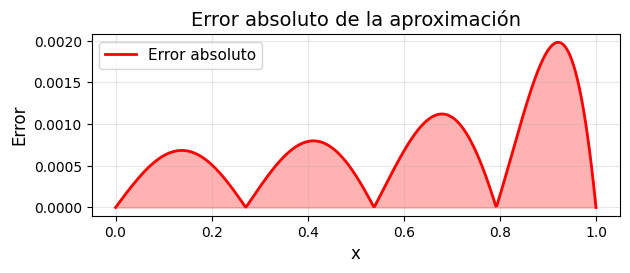

In [72]:
# GRÁFICA: ERROR
plt.subplot(2, 1, 2)
error_abs = np.abs(u_approx_vals - u_exact_vals)
plt.plot(x_vals, error_abs, 'r-', label='Error absoluto', linewidth=2)
plt.fill_between(x_vals, 0, error_abs, alpha=0.3, color='red')
plt.xlabel('x', fontsize=12)
plt.ylabel('Error', fontsize=12)
plt.title('Error absoluto de la aproximación', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=11)
plt.tight_layout()
plt.show()